# Controllable text generator of spooky authors 
###  Lucas Hideki Ueda 
####  University of Campinas, Eletrical and Computational Engineering Faculty, lucashueda@gmail.com
<br>
<br>



#####  Abstract

Abstract— Natural   Natural language processing (NLP) has undergone major changes with the introduction of embeddings, trasformers and so on. Generating text is one of the tasks of NLP and has undergone major advances in recent years with the GPT-2 and GPT-3. In this work we seek to study a way to control the generation of texts, based on 3 land story writers.Our source  code  is  publicly  available  at https://github.com/lucashueda/reproducible_research . 

**Keywords:   language   modeling,   variational   autoencoder,normalizing  flows,  deep  learning,  spooky  author.**


In [3]:
from IPython.display import display, Image

### 1. Introduction

Language modelling tries to estimate a probability density function that can predict next token by the past ones [1]. This technique allows us to represent words in a latent space by using dense vectors with fixed dimensional. This dense vector is used in the literature with two main purposes, the first is a better representation of a phrase intead of an one hot vector and the second one is to control latent meanings by finding patterns in this latent space ([2], [4]).

Text   generation   it’s   a   very   hard   task   in   NLP because of its "human" nature, it is very hard to find a way to generate text as a human since there is no specific pattern known in humans generated texts. Text DE-Generation  is  yet  a  big  problem which makes algorithms very repetitive and with no reasonable meaning of the generated texts [3]. Additionally there is no  main way  to  validate  a  text  generator  in  terms  of  reasonable and  coherence  with  human  language  in  an  automatic  way. Additionally to control the text that is generated is one more problem in this task.

In this work we try to make a fully text generator system that is able to produce reasonable texts conditioned by an author embedding, i.e., by given as input an initial text and a author embedding the system is able to produce text as this target author. We use an dataframe that has texts from 3 spooky authors, Edgar Allan Poe, H.P. Lovecraft and Marry Shelley. This is a dataframe from a kaggle competition and has a lot of sentences of these 3 authors, we will use this dataframe to extract author's embeddings and generate our proposed method.



This   work   is   organized   as   follows:   Section   1   is   the introduction, Section 2 we describe the methods that motives our  proposed  method,  in  Section  3  we  describe the experiments made in the dataset and the architectures tested,  Section  4  and  5  we  discuss  and conclude our work. Further sections are just the source code and acknowledgements.


### 2. Methods

In this section we are going to summarize the motivations of our proposed method.

#### 2.1. Language Modeling

Language   modelling   is   the   process   to   estimate   the probability  density  function  that  can  predict  a  token  given an  array  of  past  tokens  [1].  This  approach  can  be  used  to generate tokens, but the more gain about this technique was about  word  representation  [2]  where  a  dense  vector  could represent better a token than its one-hot vector, it allows a lot of evolution in NLP with GloVE, ElMO and more recently with Transformers. In  this  project   we  are  going  to  use  the   meaning  of language  modelling  to  generate  our  tokens,  we  could  use a   sequence-to-sequence   modelling   instead   of   per   token generation  but  for  isolated  effects  purposes  we  choose  towork  with  a  simple  way  to  do  the  token  generation.  Also we will do ablation using top-k and nucleus sampling [3] as decoding metodologies that are the best for our purpose.

#### 2.2. Umap


To visualize the ability of this latent representation to differentiate the writing style of each author, we will use UMAP, a methodology for reducing vector dimensionality. UMAP seeks, based on the initial data topology, to represent it efficiently in a smaller dimension (2D), which allows us to graphically visualize the topology of the generated representations.

### 3. Experiments

In this section we describe all of our experiments, the first one consist in an analysis on the dataset and the next two describing the models and the experiments done. 

#### 3.1. Experiments: Spooky author dataset

The dataset is provided by a kaggle competition that had as objective to classify a text with one of the three authors by texts, we will use the same dataset but for generative modelling purposes. It has 19579 observations such that almost a third by each author (Figure 1) and the number of words (tokens) goes from 2 to 861.

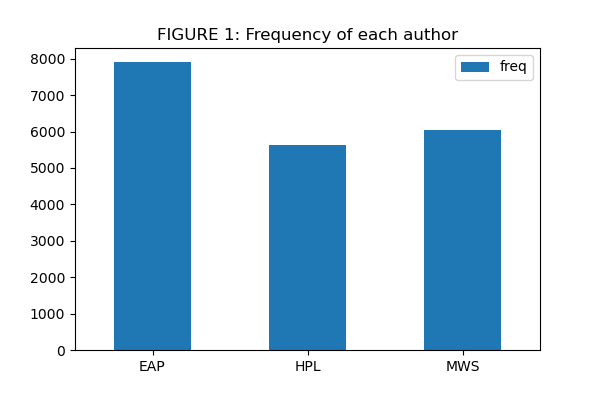

In [19]:
display(Image(filename='figure1_frequency_author.png'))

Figure 2: Wordcloud for Edgar Allan Poe

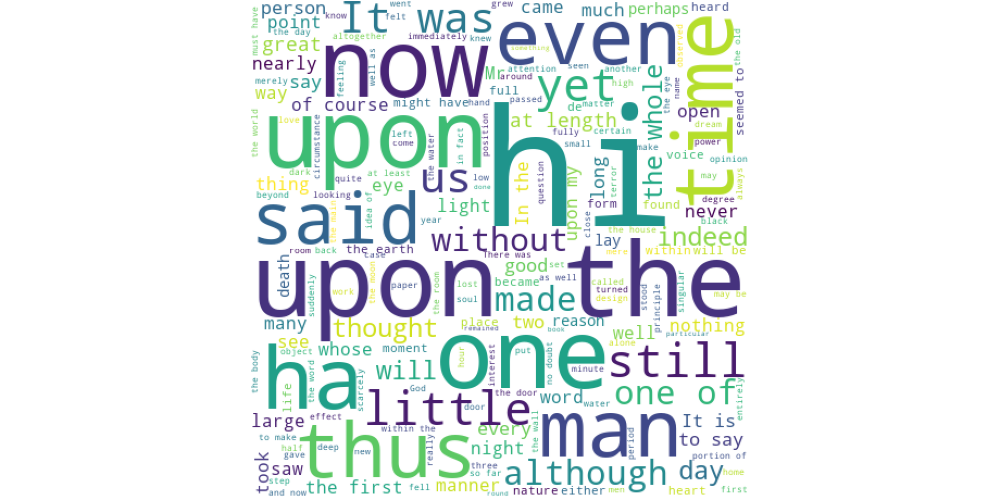

In [24]:
display(Image(filename='wordcloud_EAP.png'))

Figure 3: Wordcloud for HP Lovecraft.

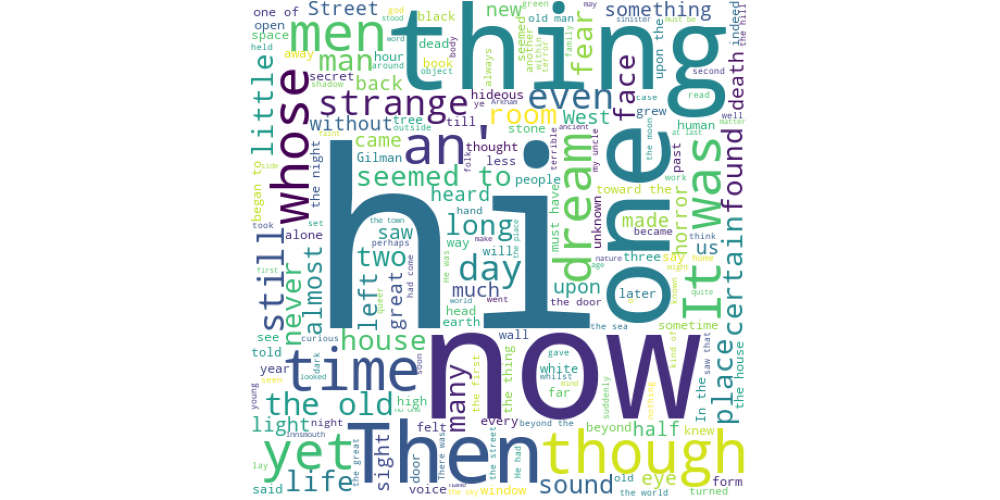

In [25]:
display(Image(filename='wordcloud_HPL.png'))

Figure 4: Wordcloud for Marry Shelley

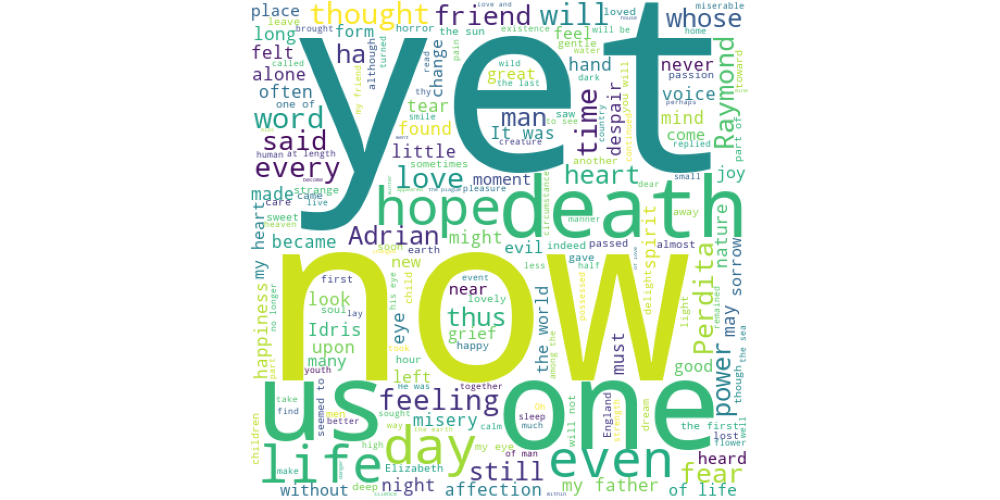

In [26]:
display(Image(filename='wordcloud_MWS.png'))

#### 3.2. Experiments: Vanilla model


As a baseline we use a simplified structure, where we try to predict the next token from the previous N. We just focus our model by concatenating the author id to the input tokens, so the model could learn which author writes each sentence.

Figure 5: The vanilla method. Just a simple Language Model with one hot target author injection.

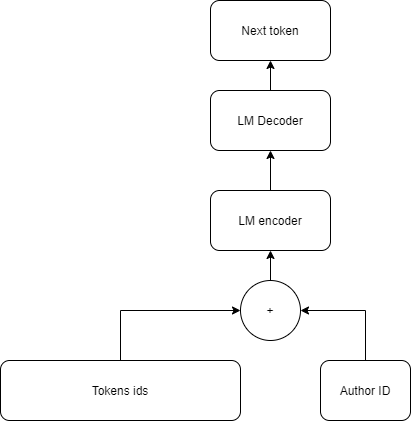

In [20]:
display(Image(filename='../figures/vanilla_figure.png'))

We performed analyzes using Topk, greedy and Nucleus Sampling as decoders, and despite the uninterpretable results, Nucleus Sampling was the one that had less textual degeneration.

It is possible to observe from the training graphs (Figures 6 and 7) that with the simplified structure it is not possible to reach levels below 2000 perplexity without overfitting.

Figure 6: Loss and Perplexity in 10 epochs.

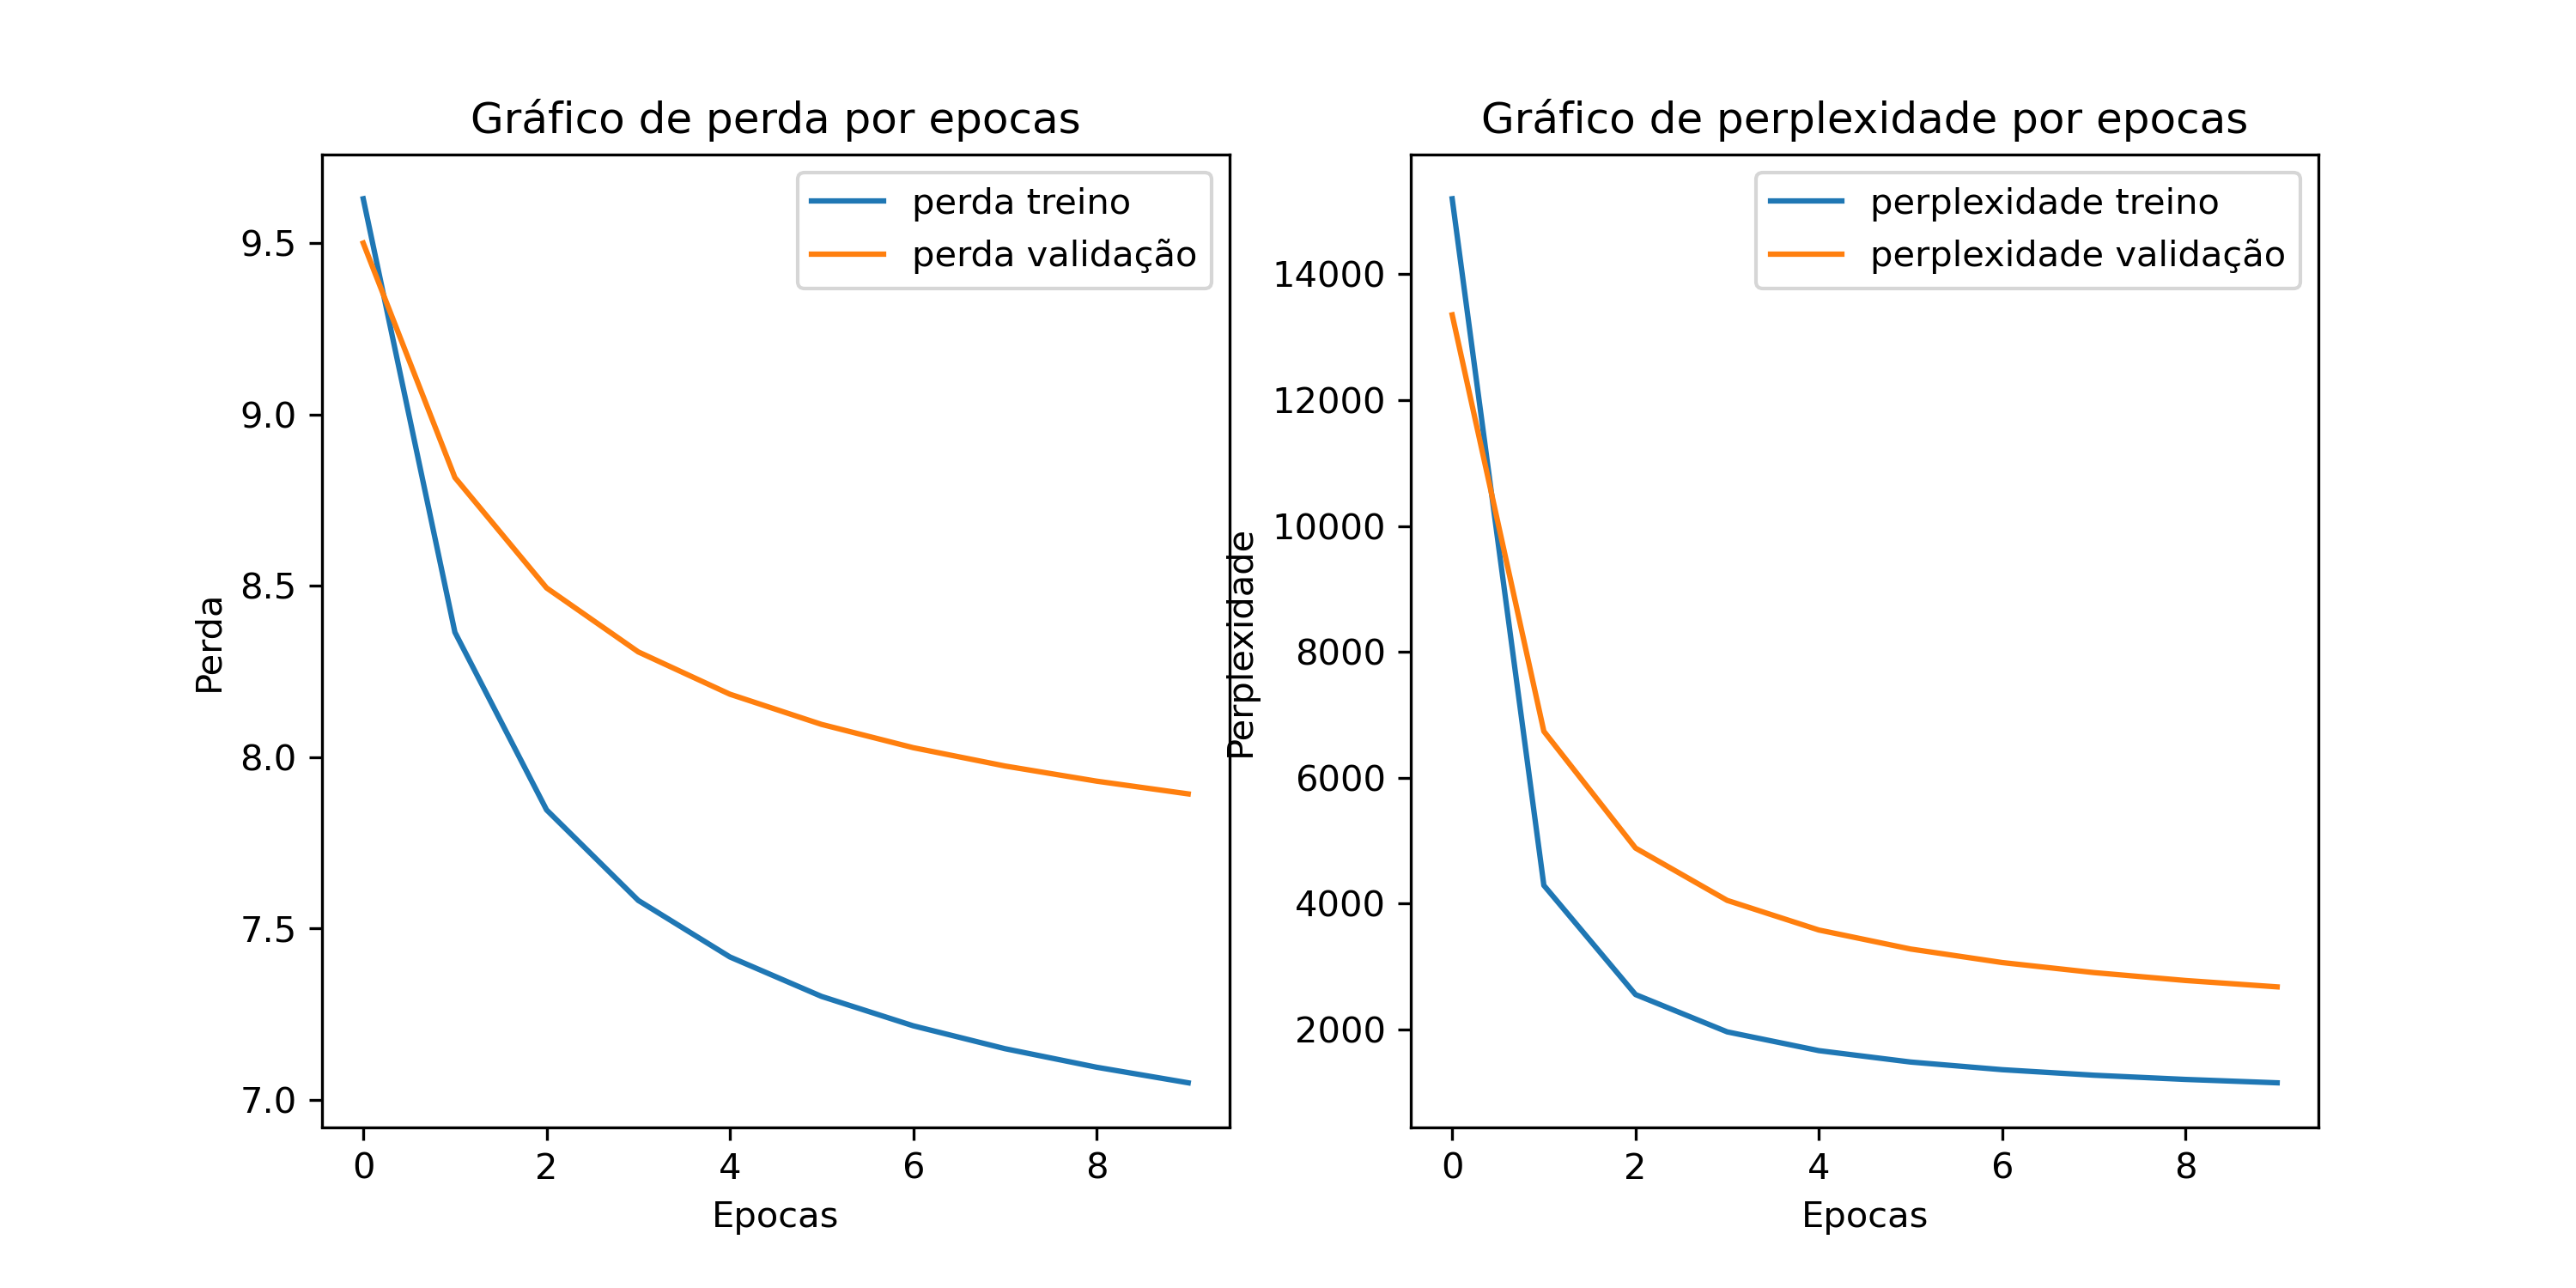

In [21]:
display(Image(filename='../dev/fixed_stuff/10_epochs_train.png'))

Figure 7: Loss and perplexity in 20 epochs.

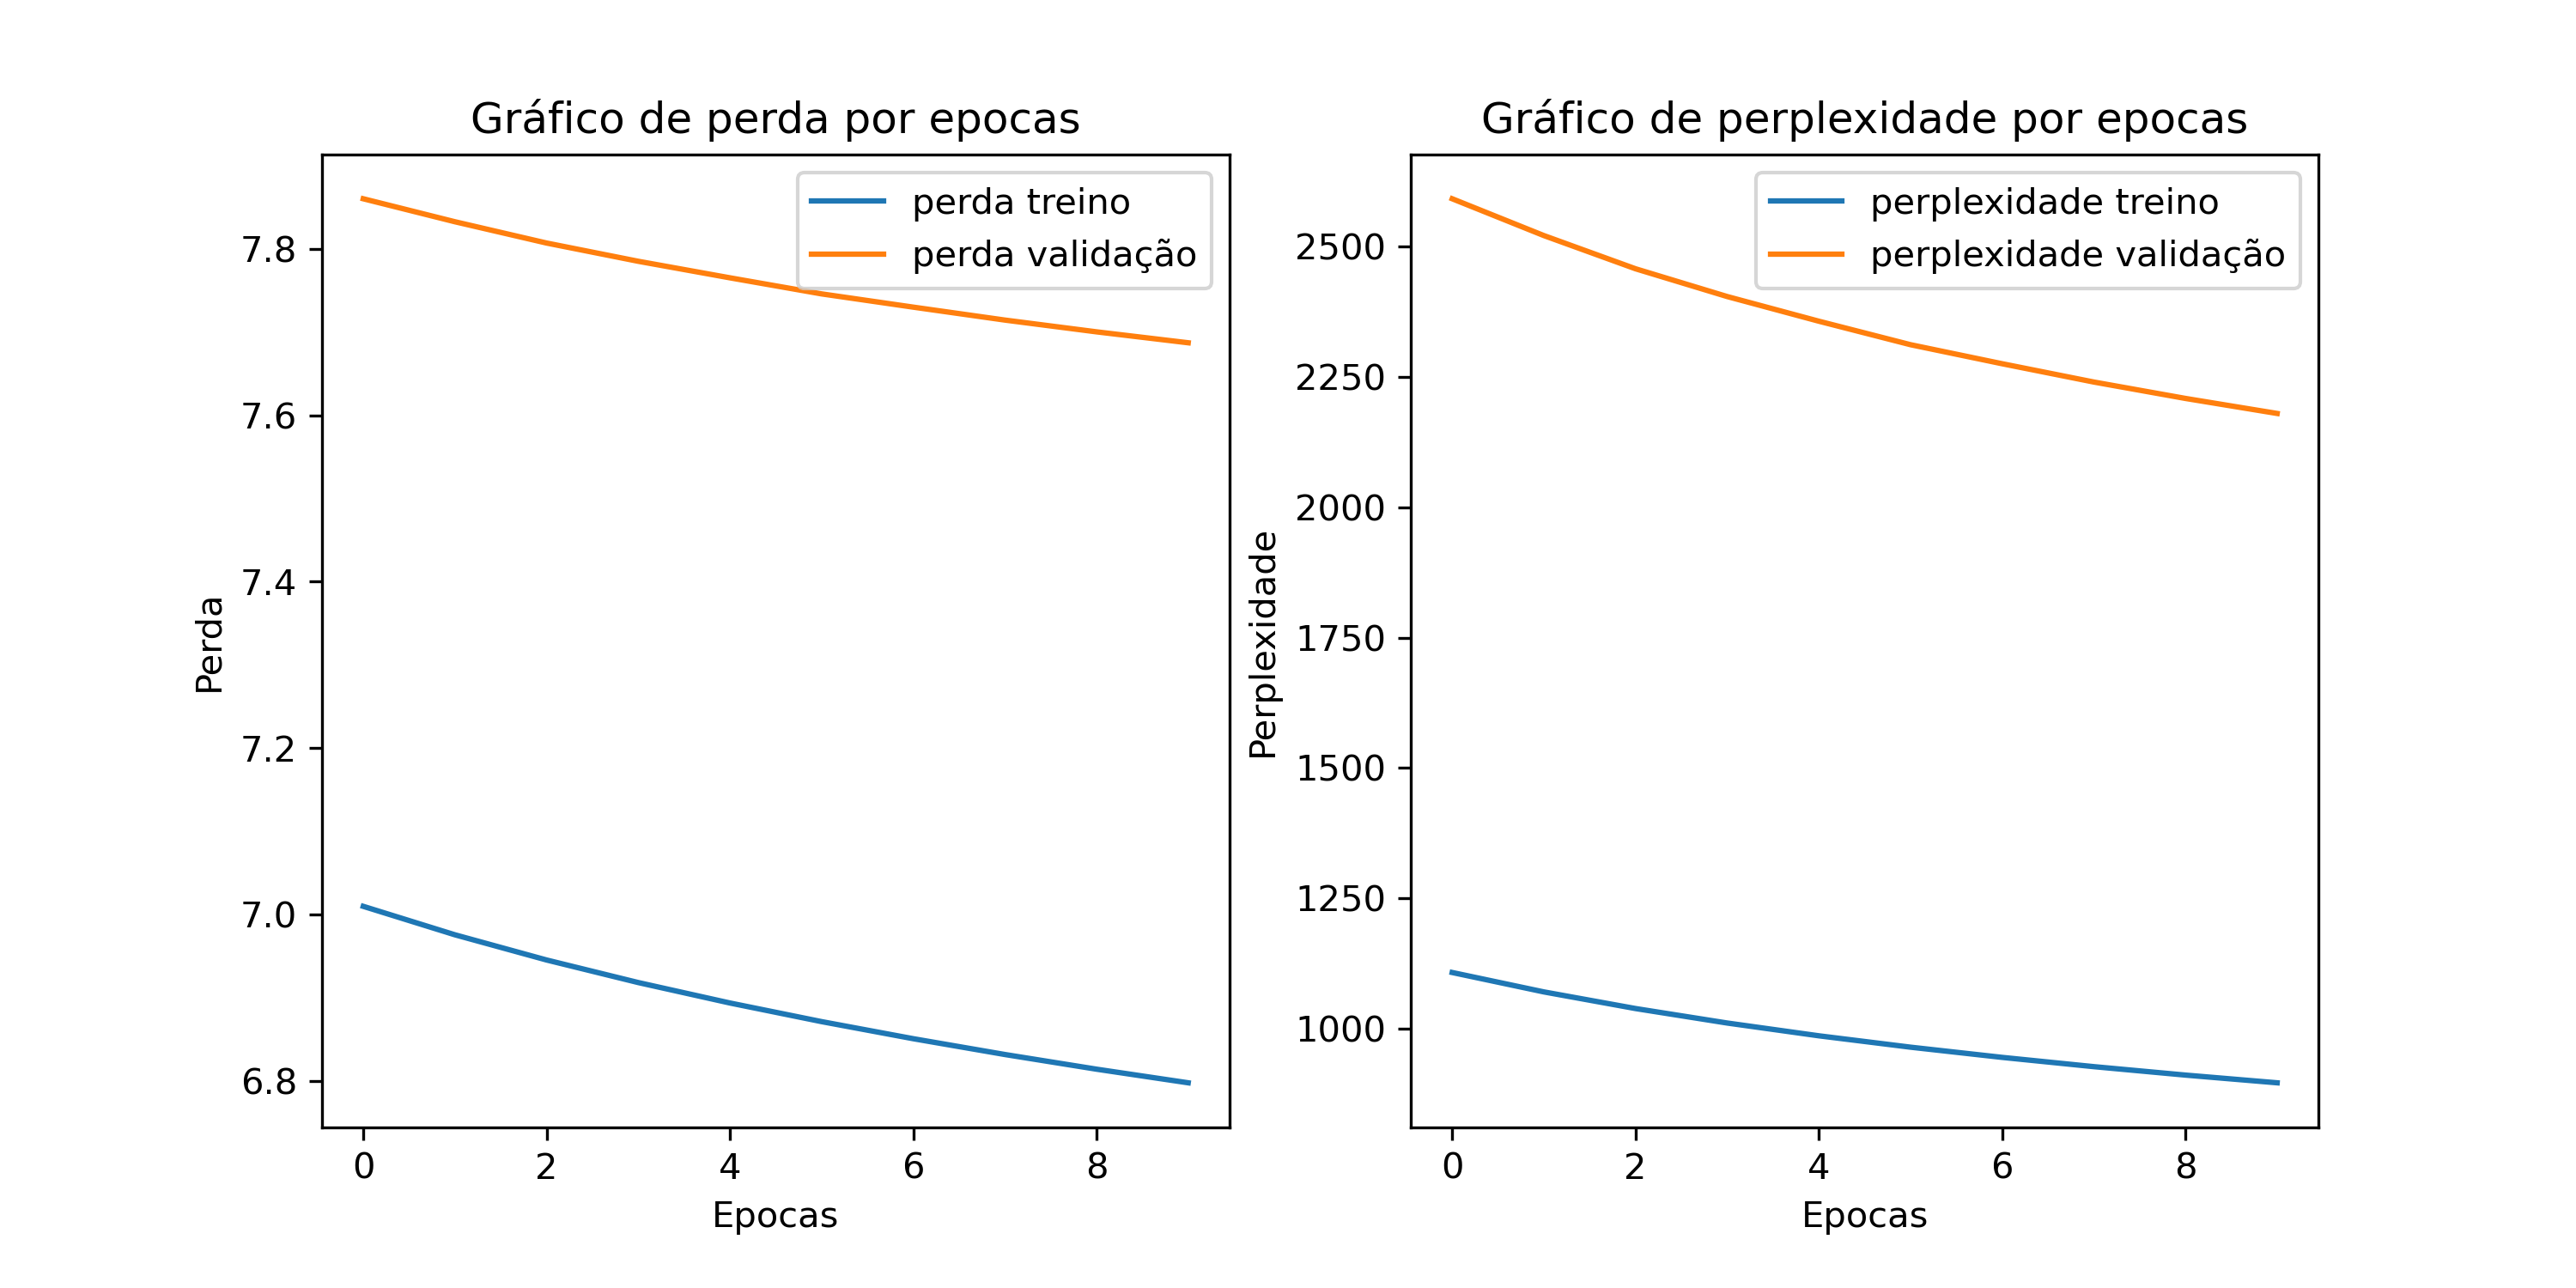

In [22]:
display(Image(filename='../dev/fixed_stuff/20_epochs_train.png'))


It was also observed that the methodology was not able to generate separable representations, thus impairing the textual generation in a controlled manner.

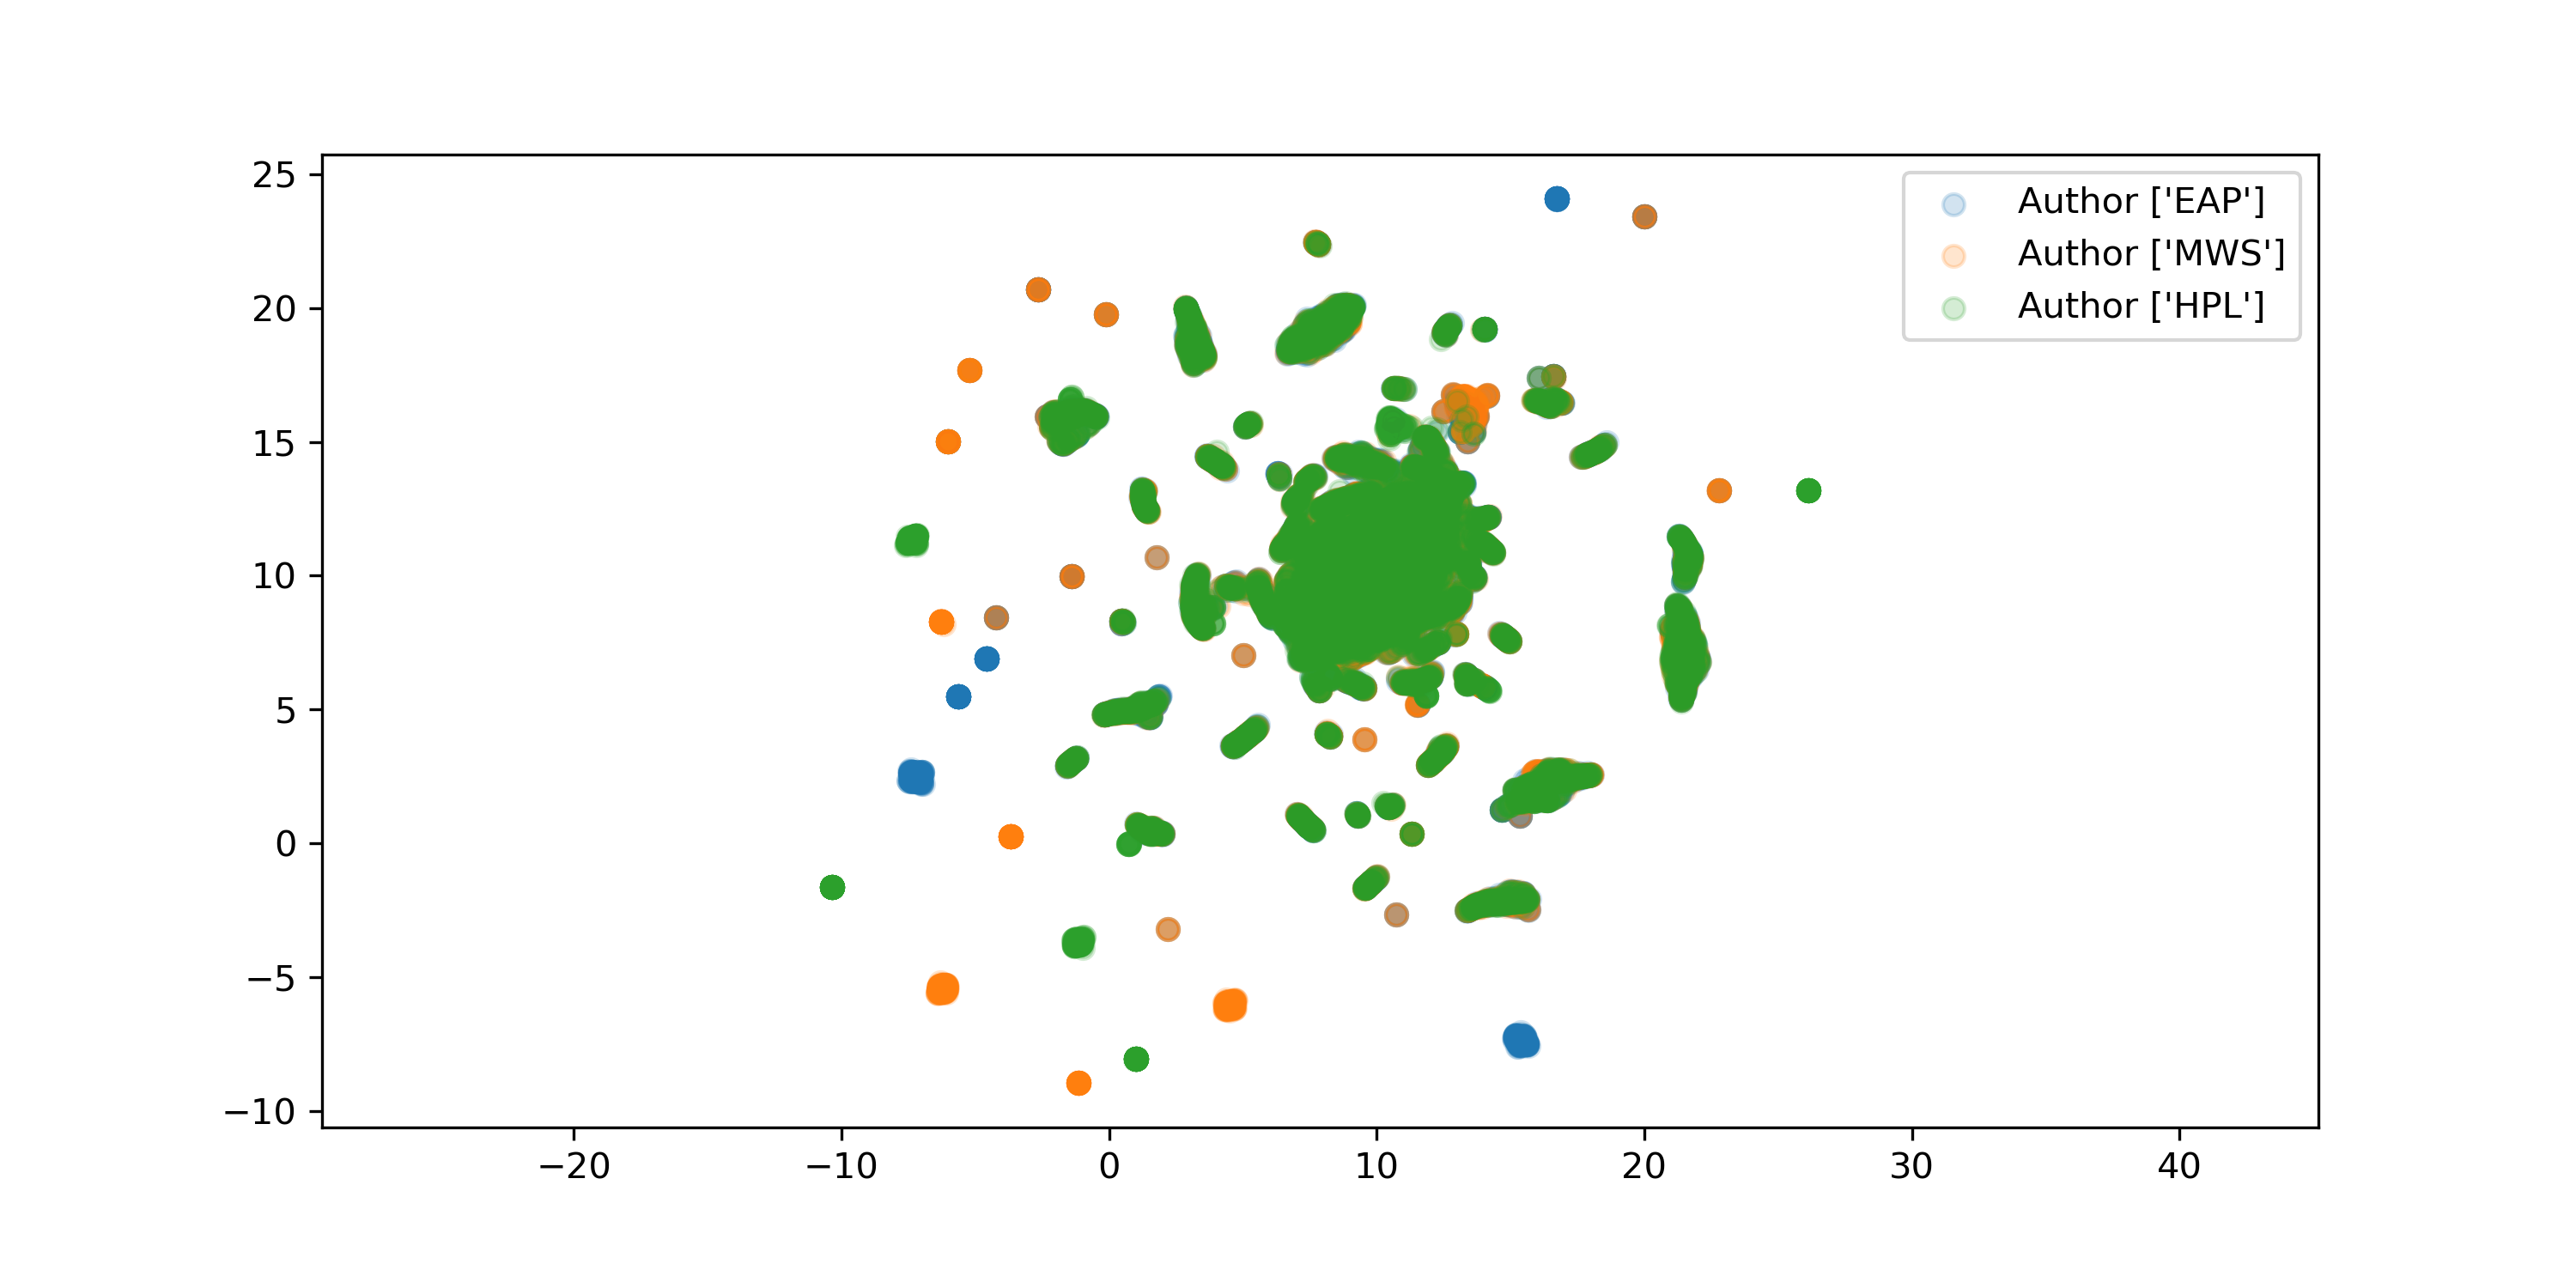

In [23]:
display(Image(filename='../dev/fixed_stuff/umap_embedding.png'))

#### 3.3. Experiments: Proposed model

Our proposed method is based in a Transformer variation that  is  memory  efficient,  the  Reformer.  We  add  an  author embedding  together  with  the  first  N  tokens  to  generate  a new  token as show in Figure 5.  We  perform  ablations  using  top-k  and  nucleus sampling decoders and evaluate using our own metric.

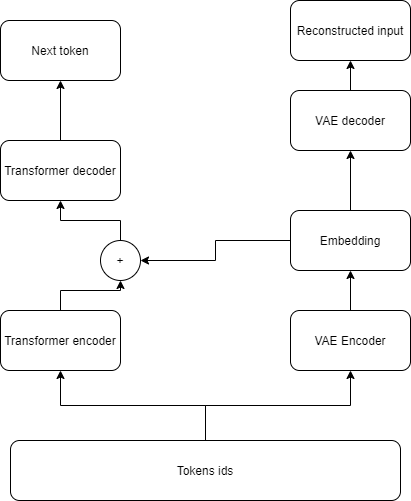

In [9]:
display(Image(filename='../figures/proposed_figure.png'))


Figure 5: The proposed method. The VAE architecture is trained separated to generate the VAE encoder output and concatenate in Transformer encode.


The proposed model has not yet yielded results, so this section has not yet been completed with the experiments.

### 4. Discussion

From the analyzes carried out it was possible to observe that a simple architecture suffers to be able to generate phrases with some meaning, which consequently implies the result when controlling the generated phrase. The training is unstable and the definition of training parameters needs to be carried out carefully. It was possible to verify that the Nucleus Sampling decoding methodology really becomes better when aiming at the generation of texts, while the greedy search and top-k methodologies end up falling into textual degeneration very quickly.

### 5. Conclusion


It will be extremely necessary to use already trained models, such as GPT-2 or BERT, due to their pre-ability to generate coherent texts, and thus only direct to our specific task, the text control given by an author. Initial tests have already been carried out proving the quality of the textual generation of algorithms such as the GPT-2; however, until the present moment of the project, no results have been obtained from fine tuning.

### 6. Source code

All the code used to do this project and instructions to reproduce it are available in https://github.com/lucashueda/reproducible_research.

### 7.  Acknowledgements

This project is part of Computational Reproducible Research course at Unicamp (1S2020).

### References

[1]  P. V. C. J. Yoshua Bengio, R ́ejean Ducharme, “A neural probabilistic language    model,” online:http://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf, 2003.

[2]  G. C. J. D. Tomas Mikolov, Kai Chen, “Efficient estimation of word representations  in  vector  space,” online:https://arxiv.org/abs/1301.3781, 2003.

[3]  L.  D.  M.  F.  Y.  C.  Ari  Holtzman,  Jan  Buys,  “The  curious  case of neural text degeneration,” online:https://arxiv.org/abs/1904.09751, 2019.

[4]  M. W. Diederik P Kingma, “Auto-encoding variational bayes,” online:https://arxiv.org/abs/1312.6114, 2013.

[5]  Y.  M.  Kei  Akuzawa,  Yusuke  Iwasawa,  “Expressive  speech  synthesis via   modeling   expressions   with   variational   autoencoder,” online:https://arxiv.org/abs/1804.02135, 2018.

[6]  N. P. J. L.-T. Vatsal Aggarwal, Marius Cotescu and R. Barra-Chicote,“Using   vaes   and   normalizing   flows   for   one-shot   text-to-speech synthesis  of  expressive  speech,” online:https://arxiv.org/pdf/1911.12760.pdf, 2020.

[7]  S.    M.    Danilo    Jimenez    Rezende,    “Variational    inference    with normalizing flows,” online:http://proceedings.mlr.press/v37/rezende15.pdf, 2015.

[8]  N. P. J. U.-L. J. A. N. G. L. K. I. P. Ashish Vaswani, Noam Shazeer,“Attention  is  all  you  need,” online:https://arxiv.org/abs/1706.03762, 2017.

[9]  A.   L.   Nikita   Kitaev,   Łukasz   Kaiser,   “Reformer:   The   efficient transformer,” online:https://arxiv.org/abs/2001.04451,2020.

[10]  R.  R.  Stanley  Chen,  Douglas  Beeferman,  “Evaluation  metrics  for language models,” online:https://www.cs.cmu.edu/ ̃roni/papers/eval-metrics-bntuw-9802.pdf, 2001.

[11]  T. W. Kishore Papineni, Salim Roukos and W.-J. Zhu, “Bleu: a method for automatic evaluation of machine translation,” online:https://www.aclweb.org/anthology/P02-1040.pdf, 2002.

[12]  N.  Craswell,Mean Reciprocal Rank,  pp.  1703–1703.   Boston,  MA:Springer US, 2009.